**Import Libraries**

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from sklearn import preprocessing
from keras.layers import Conv1D, Flatten, MaxPooling1D, GRU, Dropout, Bidirectional
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

**Import Dataset**

In [2]:
# Load the dataset
stock = pd.read_csv('/content/CIPLA.csv')

**Data Preprocessing**

In [3]:
stock = stock.drop(['Symbol', 'Series', 'Prev Close', 'VWAP', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble'], axis=1)

# Data preprocessing
window_size = 50
X = []
Y = []

for i in range(len(stock) - window_size - 1):
    first = stock.iloc[i, 4]
    temp = [(stock.iloc[i + j, 4] - first) / first for j in range(window_size)]
    temp2 = [(stock.iloc[i + window_size, 4] - first) / first]
    X.append(np.array(temp).reshape(50, 1))
    Y.append(np.array(temp2).reshape(1, 1))

**Train-test split**

In [4]:
# Train-test split
train_X, test_X, train_label, test_label = train_test_split(X, Y, test_size=0.2, shuffle=False)
len_t = len(train_X)

**Convert to numpy arrays**

In [5]:
# Convert to numpy arrays
train_X = np.array(train_X).reshape(len(train_X), 50, 1)
test_X = np.array(test_X).reshape(len(test_X), 50, 1)
train_label = np.array(train_label)
test_label = np.array(test_label)

**Model Building**

In [9]:
# Model building
model = Sequential()
# Add CNN layer for feature extraction
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(window_size, 1)))
model.add(MaxPooling1D(pool_size=2))
# Add a BiGRU layer for sequence modeling
model.add(Bidirectional(GRU(200, return_sequences=True)))
# Add a Flatten layer to flatten the output of the BiGRU layer
model.add(Flatten())
# Add Dense layer for regression
model.add(Dense(1, activation='linear'))

# model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 48, 64)            256       
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 24, 64)            0         
 g1D)                                                            
                                                                 
 bidirectional (Bidirection  (None, 24, 400)           319200    
 al)                                                             
                                                                 
 flatten (Flatten)           (None, 9600)              0         
                                                                 
 dense (Dense)               (None, 1)                 9601      
                                                                 
Total params: 329057 (1.26 MB)
Trainable params: 32905

**Compile the model**

In [10]:
# Compile the model
model.compile(optimizer='RMSprop', loss='mse')

**Defining the EarlyStopping callback**

In [11]:
# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

**Model Training and Evaluation**

In [12]:
# Model training
model.fit(train_X, train_label, validation_data=(test_X, test_label), epochs=20, batch_size=64, shuffle=False, callbacks=[early_stopping])

# Model evaluation
loss = model.evaluate(test_X, test_label)
print("Test Loss:", loss)

Epoch 1/20
75/75 [==============================] - 7s 19ms/step - loss: 0.0106 - val_loss: 0.0019
Epoch 2/20
75/75 [==============================] - 1s 8ms/step - loss: 0.0056 - val_loss: 0.0014
Epoch 3/20
75/75 [==============================] - 1s 11ms/step - loss: 0.0042 - val_loss: 0.0012
Epoch 4/20
75/75 [==============================] - 1s 11ms/step - loss: 0.0034 - val_loss: 0.0011
Epoch 5/20
75/75 [==============================] - 1s 11ms/step - loss: 0.0028 - val_loss: 9.5545e-04
Epoch 6/20
75/75 [==============================] - 1s 9ms/step - loss: 0.0025 - val_loss: 8.6334e-04
Epoch 7/20
75/75 [==============================] - 1s 8ms/step - loss: 0.0023 - val_loss: 7.9931e-04
Epoch 8/20
75/75 [==============================] - 1s 8ms/step - loss: 0.0022 - val_loss: 7.6201e-04
Epoch 9/20
75/75 [==============================] - 1s 8ms/step - loss: 0.0020 - val_loss: 7.3412e-04
Epoch 10/20
75/75 [==============================] - 1s 8ms/step - loss: 0.0019 - val_loss: 7.

**Plotting**

In [ ]:
# Plotting
predicted = model.predict(test_X)
predicted = np.array(predicted[:, 0]).reshape(-1, 1)
test_label = np.array(test_label[:, 0]).reshape(-1, 1)

for j in range(len_t, len_t + len(test_X)):
    temp = stock.iloc[j, 4]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp



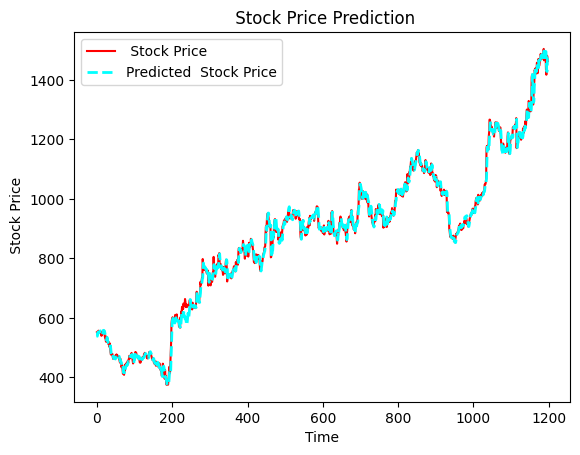

In [15]:
# Plotting
plt.plot(test_label, color = 'red', label = ' Stock Price')
plt.plot(predicted, color = 'cyan', label = 'Predicted  Stock Price', linestyle='dashed', linewidth=2)
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

**Metrics**

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate MSE
mse = mean_squared_error(test_label, predicted)
print("Mean Squared Error (MSE):", mse)
# Calculate MAE
mae = mean_absolute_error(test_label, predicted)
print("Mean Absolute Error (MAE):", mae)
# Calculate RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
# Calculate MAPE
mape = mean_absolute_percentage_error(test_label, predicted)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Squared Error (MSE): 303.78945176834605
Mean Absolute Error (MAE): 12.02092288936744
Root Mean Squared Error (RMSE): 17.42955684371654
Mean Absolute Percentage Error (MAPE): 1.4459865372761365
